In [1]:
from model import *
from helpers import *

In [176]:
t, vol, height = LIP_volume(results,A0=4.45)

Total LIP volume used: 8.3 Mkm3
Total LIP height used: 1.9 km
Initial P_eff required: 200 m/Myr


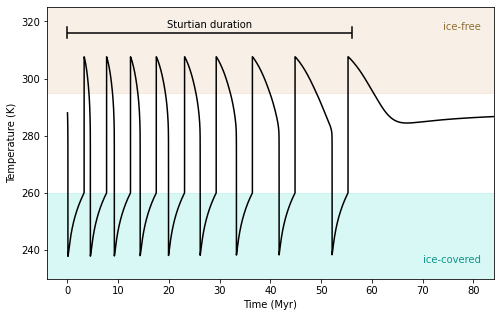

In [177]:
fig = plot_temp(results,figname='limit_cycle_example.png')

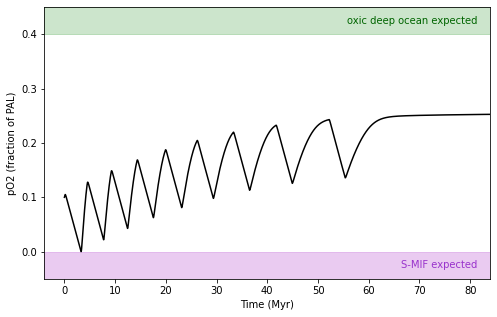

In [178]:
fig = plot_O2(results)

In [179]:
t_max=100

params = {'W_LIP':8,'tau':18,'V_C':9,'V_red':1.8,'PC_LIP':0.009}
results = run_model(t_max=t_max,**params,verbose=False)

In [180]:
t = results["t"]
snowball = results["snowball"]
sb_starts, sb_ends, sb_durs, ig_durs = get_times(t, snowball)
print(f"First Snowball begins at {sb_starts[0]:0.2f} Myr")
print(f"Last Snowball ends after {(sb_ends[-1]-sb_starts[0]):0.2f} Myr")

First Snowball begins at 0.09 Myr
Last Snowball ends after 54.04 Myr


Total LIP volume used: 8.3 Mkm3
Total LIP height used: 1.8 km
Initial P_eff required: 175 m/Myr


Text(0, 0.5, 'LIP height used [km]')

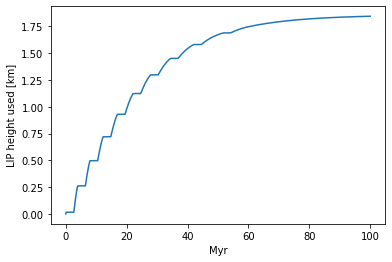

In [181]:
t, vol, height = LIP_volume(results,A0=4.5)
plt.plot(t,height/1e3)
plt.xlabel('Myr')
plt.ylabel('LIP height used [km]')

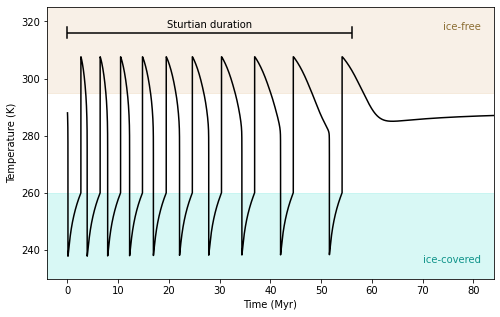

In [182]:
fig = plot_temp(results,figname='limit_cycle_example.png')
#savefig(fig,'limit_cycle_example.svg',savefmt='svg') 

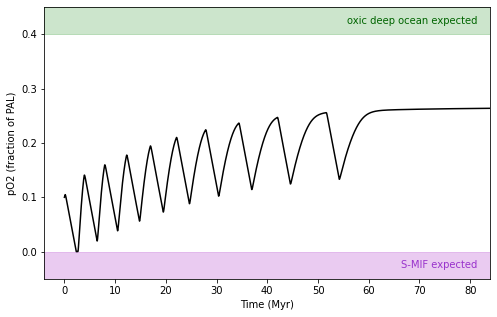

In [183]:
fig = plot_O2(results)

In [2]:
t_max=100

params = {'W_LIP':9,'tau':18,'V_C':8.5,'V_red':1.7,'PC_LIP':0.009}
results = run_model(t_max=t_max,**params,verbose=False)

In [3]:
t = results["t"]
snowball = results["snowball"]
sb_starts, sb_ends, sb_durs, ig_durs = get_times(t, snowball)
print(f"First Snowball begins at {sb_starts[0]:0.2f} Myr")
print(f"Last Snowball ends after {(sb_ends[-1]-sb_starts[0]):0.2f} Myr")

First Snowball begins at 0.09 Myr
Last Snowball ends after 55.15 Myr


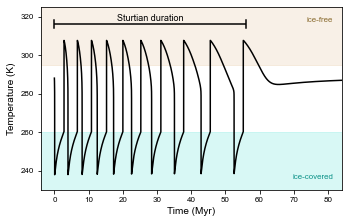

In [6]:
# temperature plot

fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

t = results['t']
T = results['T']
ax.plot(t, T, c='k', alpha=1)

# teal and tan
Ti, To = results['Ti'][0], results['To'][0]
ax.axhspan(To, 340, alpha=0.2, color='burlywood')
ax.axhspan(220, Ti, alpha=0.2, color='turquoise')
ax.set_ylim(230, 325)

# axis labels
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('Temperature (K)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)

# set x limits
t_max = 80
xmin, xmax = 0, t_max
margin = 0.05 * (xmax - xmin)
ax.set_xlim(xmin - margin, xmax + margin)

# "ice-free" and "ice-covered" labels
xlim = ax.get_xlim()
ylim = ax.get_ylim()
padding = xlim[1] * 0.03
text_x = xlim[1] - padding
ax.text(text_x, ylim[0] + 5, "ice-covered", c='#10948a', ha='right', va='bottom', fontsize=8)
ax.text(text_x, ylim[1] - 5, "ice-free", c='#8b6d32', ha='right', va='top', fontsize=8)

# Sturtian duration annotation
y = 316
tick_height = 2
ax.hlines(y, 0, 56, color='k')
ax.plot([0, 0], [y - tick_height, y + tick_height], c='k')
ax.plot([56, 56], [y - tick_height, y + tick_height], c='k')
ax.text(28, y + 1, "Sturtian duration", ha='center', va='bottom', fontsize=9)

plt.savefig('figs/limit_cycle_example.pdf', format='pdf', bbox_inches='tight')
plt.show()

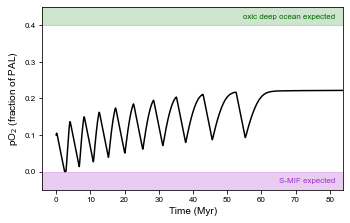

In [7]:
# O2 plot

fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

t = results['t']
pO2 = results['pO2']
ax.plot(t, pO2, c='k', alpha=1)

# axis labels and ticks
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('pO$_2$ (fraction of PAL)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)

# axes limits
t_max = 80
xmin, xmax = 0, t_max
margin = 0.05 * (xmax - xmin)
ax.set_xlim(xmin - margin, xmax + margin)
ax.set_ylim(-0.05, 0.45)

# horizontal bands and labels
xlim = ax.get_xlim()
ylim = ax.get_ylim()
padding = xlim[1] * 0.03
text_x = xlim[1] - padding

# S-MIF threshold
SMIF_threshold = (2.1 / 1e6) / 0.2  # ppm to fraction of PAL
ax.axhspan(ylim[0], SMIF_threshold, color='mediumorchid', alpha=0.3)
ax.text(text_x, -0.025, 'S-MIF expected', color='darkorchid', ha='right', va='center', fontsize=8)

# oxic deep ocean threshold
ax.axhspan(0.4, ylim[1], color='green', alpha=0.2)
ax.text(text_x, 0.425, 'oxic deep ocean expected', color='darkgreen', ha='right', va='center', fontsize=8)

plt.savefig('figs/limit_cycle_O2.pdf', format='pdf', bbox_inches='tight')
plt.show()

Total LIP volume used: 8.8 Mkm3
Total LIP height used: 2.0 km
Initial P_eff required: 200 m/Myr


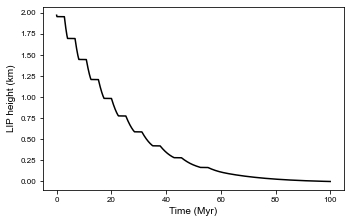

In [8]:
# volume/height

t, vol, height = LIP_volume(results,A0=4.45)

fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

max_height = np.max(height)/1e3
ax.plot(t, max_height-height/1e3, c='k', alpha=1)

# axis labels and ticks
ax.set_xlabel('Time (Myr)', fontsize=10)
ax.set_ylabel('LIP height (km)', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=8)

figname="example_LIP_height.pdf"
savefig(fig,figname,savefmt='pdf',supp_folder="supp")